# Training YOLO Model for Players, Ball and Referee on Google Colab

In [ ]:
#GPU Check

!nvidia-smi

Mon Sep 16 19:35:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change Directory

%cd /content/drive/MyDrive/Football_Project

/content/drive/MyDrive/Football_Project


In [ ]:
#Check Directory

import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Football_Project


In [ ]:
#Installing ultralytics roboflow

!pip install -q ultralytics roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.7/872.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
#Importing Required Dependencies

from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [ ]:
#Make a New Directory for Dataset

#!mkdir {HOME}/dataset
%cd {HOME}/dataset

/content/drive/MyDrive/Football_Project/dataset


In [ ]:
#Download Dataset Through Roboflow API

#from roboflow import Roboflow
rf = Roboflow(api_key="zLhowP5WwOVdP6IbDdEU")
project = rf.workspace("carton-box").project("football_project-qi0r6")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.94, to fix: `pip install ultralytics==8.0.196`


**External link for the Dataset used** (If needed to run on Local Machine): https://drive.google.com/file/d/1yBc8_7KbUlomGZow1ImE2yts5itkfJHY/view?usp=sharing

In [ ]:
#Editing the YAML file with current paths

!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

In [ ]:
#List Directory
!ls

data.yaml  Football_Project-1  README.dataset.txt  README.roboflow.txt	test  train  valid


In [ ]:
# Training YOLO Model

%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=4 epochs=50 imgsz=1280 plots=True

/content/drive/MyDrive/Football_Project
New https://pypi.org/project/ultralytics/8.2.95 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.94 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Football_Project/dataset/Football_Project-1/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1726516273.d27a3ca5d19b.4969.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3000.jpg  weights
P_curve.png					    train_batch3001.jpg
PR_curve.png					    train_batch3002.jpg


/content/drive/MyDrive/Football_Project


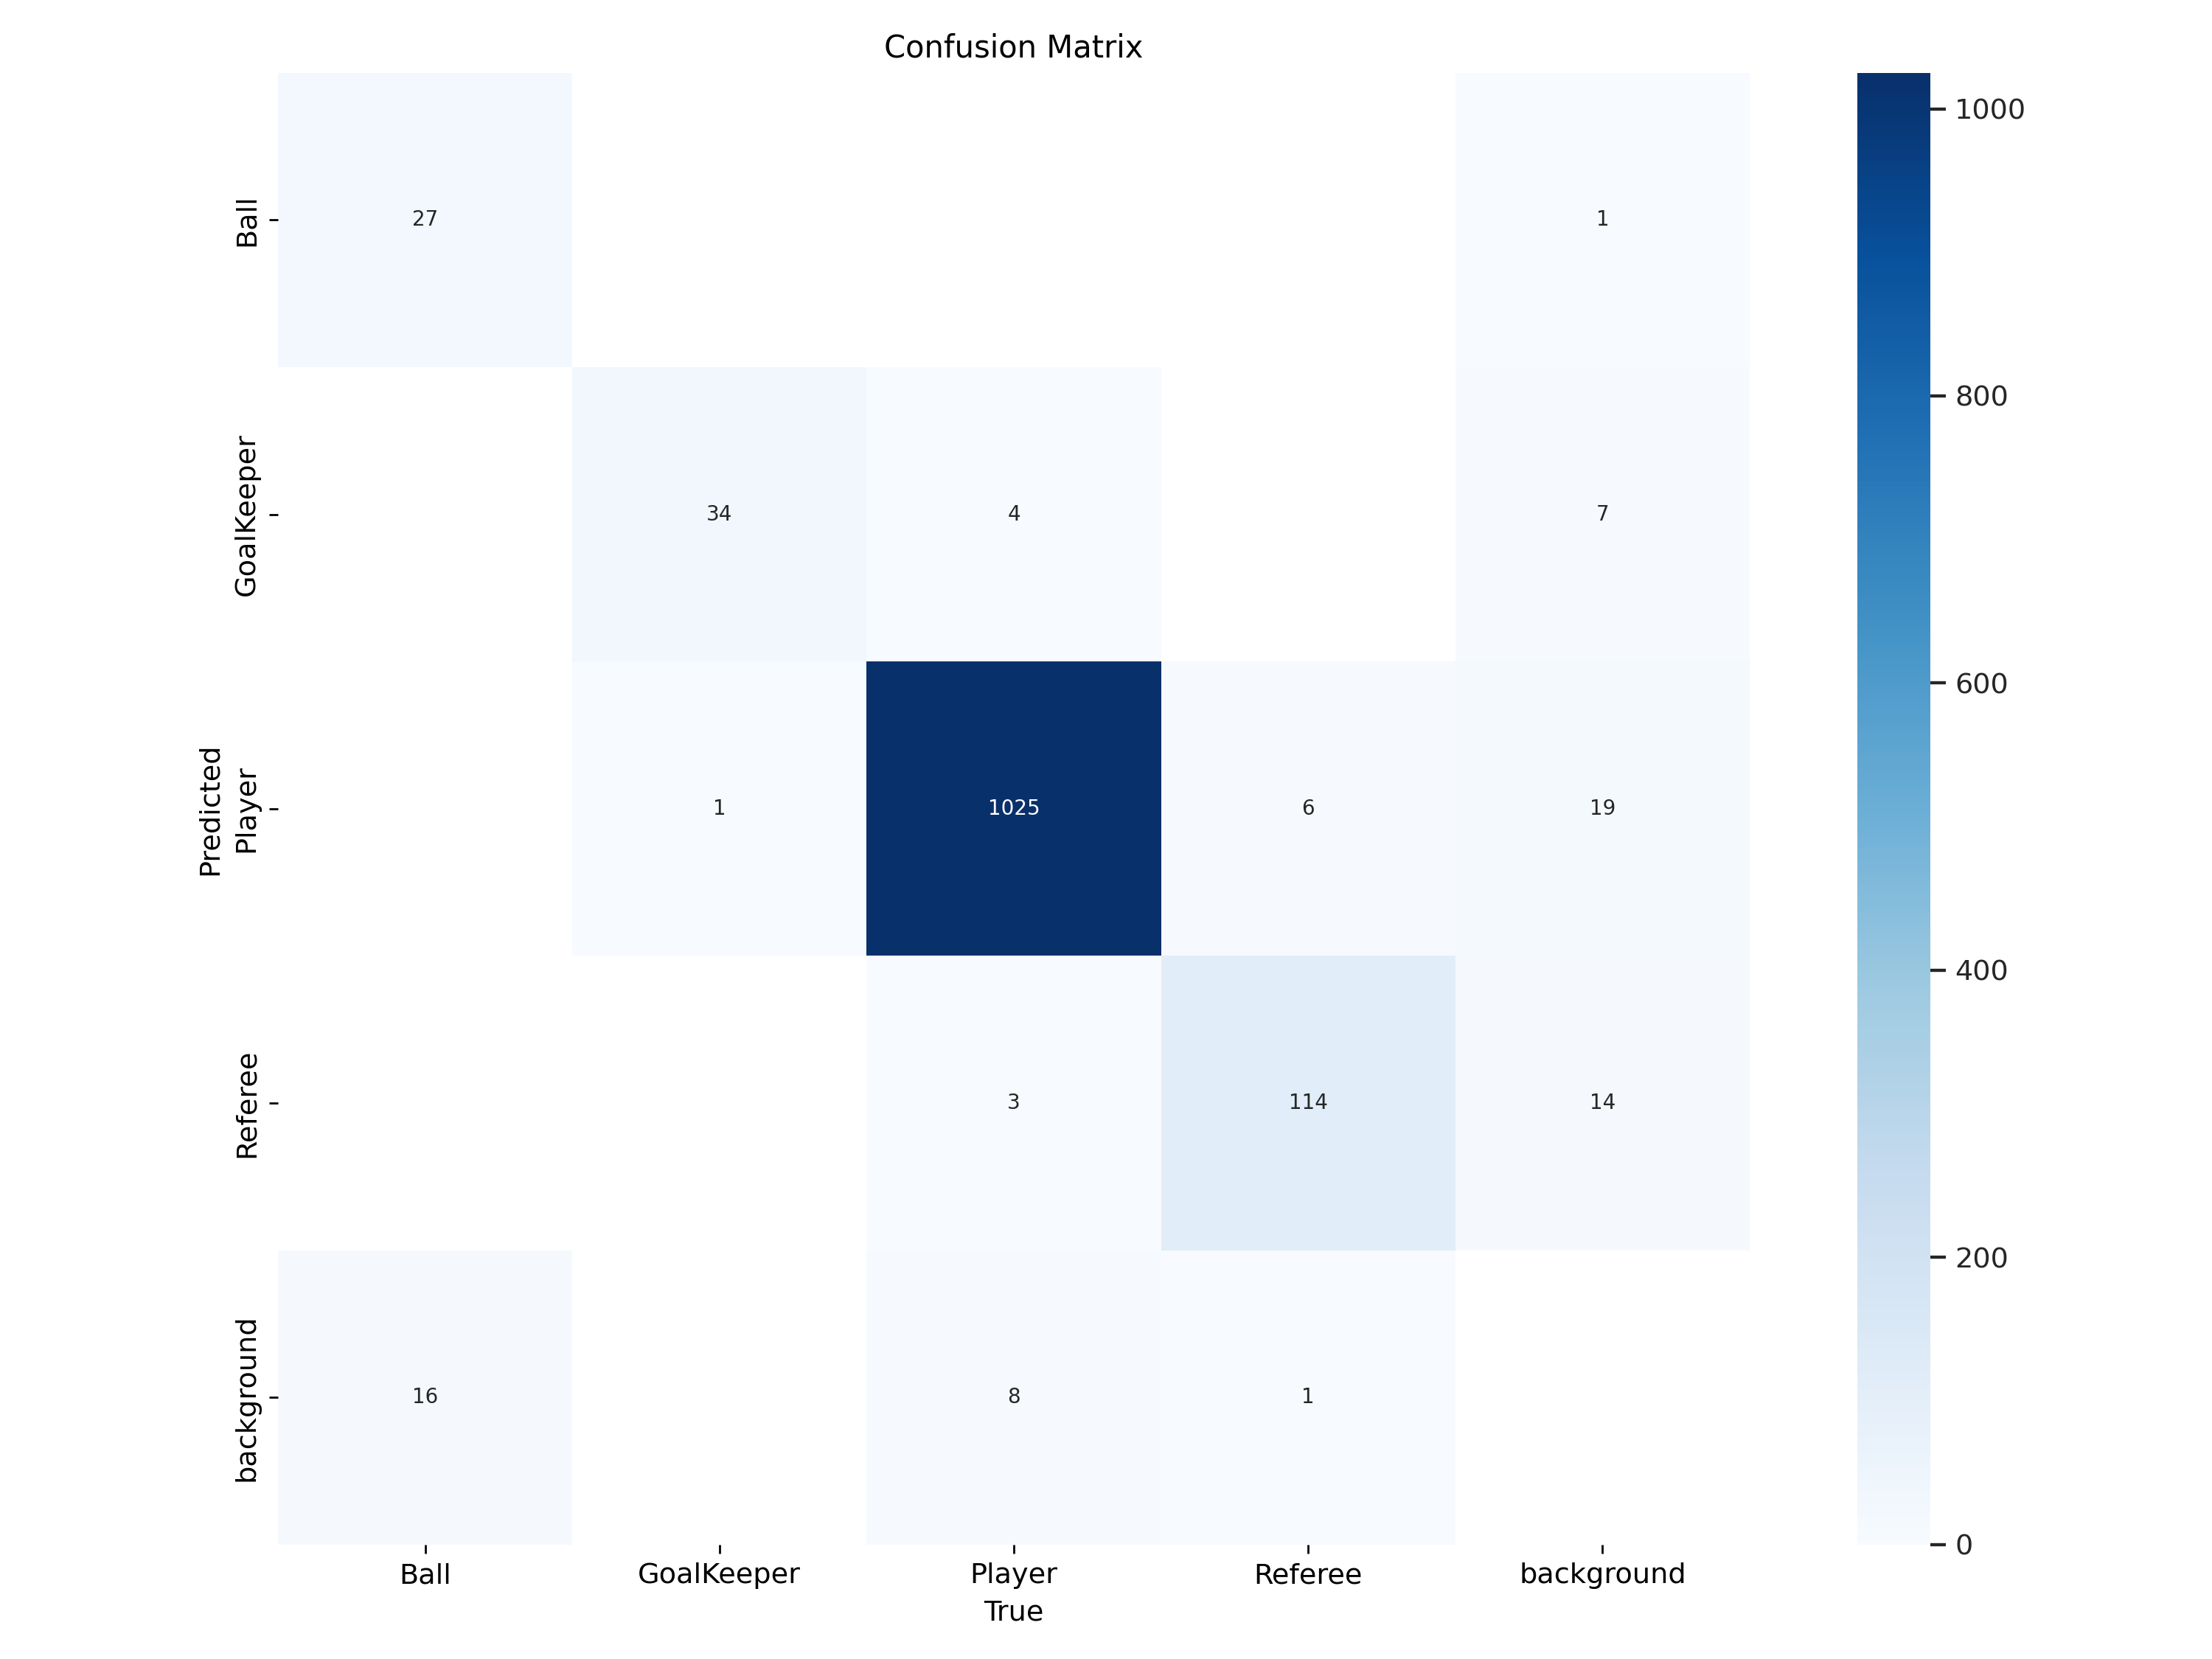

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content/drive/MyDrive/Football_Project


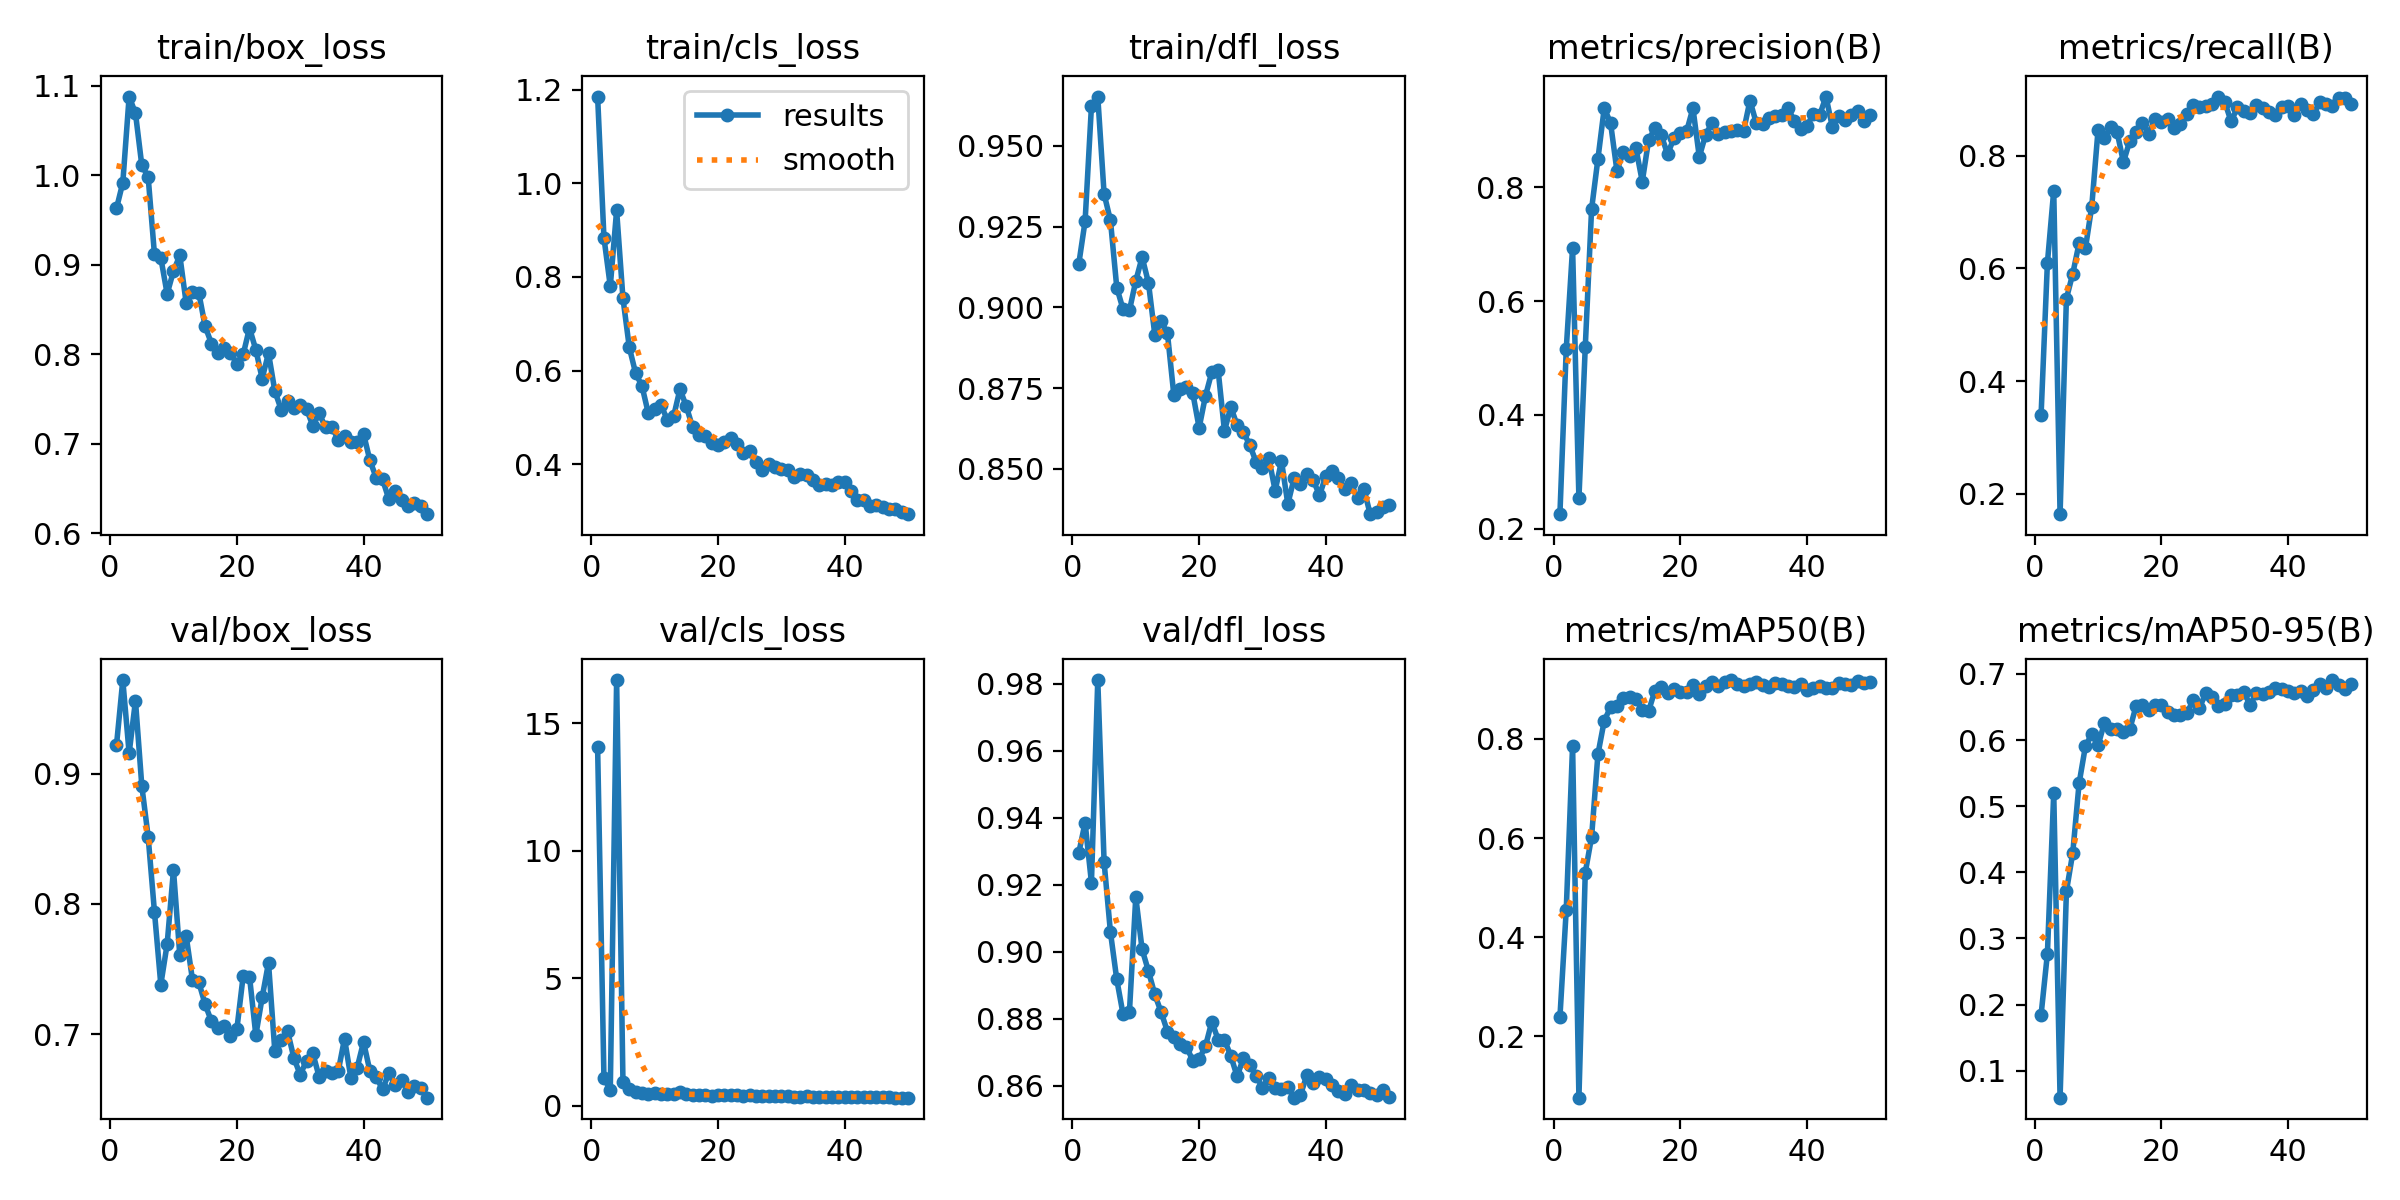

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)